## MLFLOW для экспериментов с Sklearn

In [ ]:
import mlflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Загрузка данных Титаника из csv-файла
data = pd.read_csv('titanic.csv')
data = data [['Survived','Pclass','Age','Fare']]
data = data.dropna(subset=['Age'])

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [115]:
# Разделение данных на обучающую и тестовую выборки
train, test = train_test_split(data, test_size=0.2)


# Инициализация MLflow
mlflow.set_tracking_uri("file:///D:/ML_flow_server/data_local")
mlflow.set_experiment("TreeClassifier_test")

<Experiment: artifact_location='file:///D:/ML_flow_server/data_local/484844835612135704', creation_time=1681682180137, experiment_id='484844835612135704', last_update_time=1681682180137, lifecycle_stage='active', name='test_Koldim2001', tags={}>

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Функция для построения матрицы ошибок.
    cm - матрица ошибок
    classes - список классов
    normalize - если True, то значения матрицы ошибок нормализуются к 1
    title - заголовок графика
    cmap - цветовая схема для отображения графика
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
ok


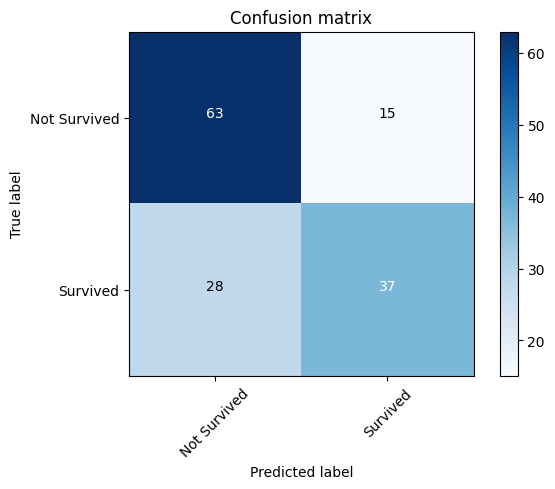

In [122]:
# Запуск контекста MLflow и сохранение гиперпараметров
try:
    with mlflow.start_run(run_name='DecisionTreeClassifier'):
        # Определение гиперпараметров модели
        max_depth = 5
        min_samples_split = 25


        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("min_samples_split", min_samples_split)

        # Создание и обучение модели решающего дерева
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
        model.fit(train.drop('Survived', axis=1), train['Survived'])

        # Вычисление метрик и сохранение их в MLflow
        preds = model.predict(test.drop('Survived', axis=1))
        acc = accuracy_score(test['Survived'], preds)
        cm = confusion_matrix(test['Survived'], preds)

        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("tn", cm[0][0])
        mlflow.log_metric("fp", cm[0][1])
        mlflow.log_metric("fn", cm[1][0])
        mlflow.log_metric("tp", cm[1][1])

        # Визуализация матрицы ошибок и сохранение ее в MLflow
        plot_confusion_matrix(cm, classes=['Not Survived', 'Survived'])
        cm_fig = plt.gcf()
        cm_fig.savefig('matrix.png')

        mlflow.log_artifact("matrix.png")

        # Сохранение модели в MLflow
        mlflow.sklearn.log_model(model, "model")
        
finally:
    mlflow.end_run()
    print('ok')